In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import process_data

In [2]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import process_data

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)
print(parent_dir)
interpolated_dir = os.path.join(parent_dir, "dataset_interpolated_fixed")
features = ["game_completed", "relative_strength", "score_difference", "type.id", "home_has_possession", "end.down", "end.yardsToEndzone", "end.distance", "field_position_shift", "home_timeouts_left", "away_timeouts_left"]

/Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML


In [26]:
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]
import process_data

training_data = process_data.load_data(interpolated_dir, 
                                       years = [2018, 2019, 2020, 2021, 2022], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win"
                                       )

validation_data = process_data.load_data(interpolated_dir, 
                                       years = [2023], 
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win",
                                       train = True
                                       )

test_data = process_data.load_data(interpolated_dir, 
                                       years = [2024],
                                       history_length = 0, 
                                       features = features, 
                                       label_feature = "home_win",
                                       train = False
                                       )

Loading data for 2022
  Processing 271 CSV files in parallel with 8 workers...
  Completed processing 2022
Loading data for 2024
skipping  2024
Loading data for 2023
skipping  2023
Loading data for .DS_Store
Loading data for 2017
skipping  2017
Loading data for 2019
  Processing 256 CSV files in parallel with 8 workers...
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fixed/2019/game_401127989.csv
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fixed/2019/game_401127963.csv
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fixed/2019/game_401127963.csv
  Completed processing 2019
Loading data for 2021
  Processing 272 CSV files in parallel with 8 workers...
  NaN found in file: /Users/aly/Documents/University_of_Waterloo/Winter 2025/Research/code/NFL/ML/dataset_interpolated_fix

In [27]:
training_data.keys()

dict_keys([0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1, 0.105, 0.11, 0.115, 0.12, 0.125, 0.13, 0.135, 0.14, 0.145, 0.15, 0.155, 0.16, 0.165, 0.17, 0.175, 0.18, 0.185, 0.19, 0.195, 0.2, 0.205, 0.21, 0.215, 0.22, 0.225, 0.23, 0.235, 0.24, 0.245, 0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.28, 0.285, 0.29, 0.295, 0.3, 0.305, 0.31, 0.315, 0.32, 0.325, 0.33, 0.335, 0.34, 0.345, 0.35, 0.355, 0.36, 0.365, 0.37, 0.375, 0.38, 0.385, 0.39, 0.395, 0.4, 0.405, 0.41, 0.415, 0.42, 0.425, 0.43, 0.435, 0.44, 0.445, 0.45, 0.455, 0.46, 0.465, 0.47, 0.475, 0.48, 0.485, 0.49, 0.495, 0.5, 0.505, 0.51, 0.515, 0.52, 0.525, 0.53, 0.535, 0.54, 0.545, 0.55, 0.555, 0.56, 0.565, 0.57, 0.575, 0.58, 0.585, 0.59, 0.595, 0.6, 0.605, 0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64, 0.645, 0.65, 0.655, 0.66, 0.665, 0.67, 0.675, 0.68, 0.685, 0.69, 0.695, 0.7, 0.705, 0.71, 0.715, 0.72, 0.725, 0.73, 0.735, 0.74, 0.745, 0.75, 0.755, 0.76, 0.7

In [28]:
modules_to_reload = [
    'models.xg_boost',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]
import process_data

from models.xg_boost import setup_xgboost_models
other_features = [
            "type.id",             # Play type (categorical)
            "home_has_possession", # Binary indicator
            "end.down",            # Down number (1-4, discrete)
            "home_timeouts_left",  # Discrete count (0-3)
            "away_timeouts_left",  # Discrete count (0-3)
        ]
numeric_features = [
    "score_difference",
    "relative_strength", 
    "end.yardsToEndzone", 
    "end.distance", 
    "field_position_shift"
]
models = setup_xgboost_models(training_data, validation_data, numeric_features = numeric_features, other_features = other_features, optimize_hyperparams=True, use_calibration=True)


Best trial: 48. Best value: 0.224598: 100%|██████████| 50/50 [00:12<00:00,  3.89it/s]


Timestep 0.00% (Optimized): Training Loss = 0.2056, Accuracy = 0.6492, Validation Loss = 0.2137, Validation Accuracy = 0.6540


Best trial: 29. Best value: 0.245192: 100%|██████████| 50/50 [00:04<00:00, 11.70it/s]


Timestep 0.50% (Optimized): Training Loss = 0.2187, Accuracy = 0.6270, Validation Loss = 0.2236, Validation Accuracy = 0.6290


Best trial: 47. Best value: 0.227322: 100%|██████████| 50/50 [00:22<00:00,  2.21it/s]


Timestep 1.00% (Optimized): Training Loss = 0.2046, Accuracy = 0.6835, Validation Loss = 0.2140, Validation Accuracy = 0.6544


Best trial: 23. Best value: 0.229864: 100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Timestep 1.50% (Optimized): Training Loss = 0.2244, Accuracy = 0.6243, Validation Loss = 0.2204, Validation Accuracy = 0.6424


Best trial: 37. Best value: 0.24339: 100%|██████████| 50/50 [00:04<00:00, 10.06it/s] 


Timestep 2.00% (Optimized): Training Loss = 0.2222, Accuracy = 0.6312, Validation Loss = 0.2380, Validation Accuracy = 0.5848


Best trial: 13. Best value: 0.22196: 100%|██████████| 50/50 [00:20<00:00,  2.47it/s]


Timestep 2.50% (Optimized): Training Loss = 0.2199, Accuracy = 0.6292, Validation Loss = 0.2117, Validation Accuracy = 0.6456


Best trial: 14. Best value: 0.224286: 100%|██████████| 50/50 [00:17<00:00,  2.91it/s]


Timestep 3.00% (Optimized): Training Loss = 0.2092, Accuracy = 0.6489, Validation Loss = 0.2107, Validation Accuracy = 0.6438


Best trial: 32. Best value: 0.239238: 100%|██████████| 50/50 [00:10<00:00,  4.91it/s]


Timestep 3.50% (Optimized): Training Loss = 0.2180, Accuracy = 0.6489, Validation Loss = 0.2270, Validation Accuracy = 0.6220


Best trial: 46. Best value: 0.237606: 100%|██████████| 50/50 [00:09<00:00,  5.15it/s]


Timestep 4.00% (Optimized): Training Loss = 0.2177, Accuracy = 0.6124, Validation Loss = 0.2263, Validation Accuracy = 0.6184


Best trial: 43. Best value: 0.228541: 100%|██████████| 50/50 [00:08<00:00,  6.11it/s]


Timestep 4.50% (Optimized): Training Loss = 0.2189, Accuracy = 0.6542, Validation Loss = 0.2152, Validation Accuracy = 0.6462


Best trial: 32. Best value: 0.228288: 100%|██████████| 50/50 [00:09<00:00,  5.43it/s]


Timestep 5.00% (Optimized): Training Loss = 0.2185, Accuracy = 0.6574, Validation Loss = 0.2178, Validation Accuracy = 0.6598


Best trial: 17. Best value: 0.222053: 100%|██████████| 50/50 [00:08<00:00,  5.59it/s]


Timestep 5.50% (Optimized): Training Loss = 0.2029, Accuracy = 0.6635, Validation Loss = 0.2099, Validation Accuracy = 0.6416


Best trial: 41. Best value: 0.230039: 100%|██████████| 50/50 [00:13<00:00,  3.58it/s]


Timestep 6.00% (Optimized): Training Loss = 0.2133, Accuracy = 0.6442, Validation Loss = 0.2186, Validation Accuracy = 0.6517


Best trial: 38. Best value: 0.22642: 100%|██████████| 50/50 [00:11<00:00,  4.49it/s] 


Timestep 6.50% (Optimized): Training Loss = 0.1964, Accuracy = 0.6990, Validation Loss = 0.2127, Validation Accuracy = 0.6617


Best trial: 49. Best value: 0.231801: 100%|██████████| 50/50 [00:21<00:00,  2.33it/s]


Timestep 7.00% (Optimized): Training Loss = 0.2062, Accuracy = 0.6593, Validation Loss = 0.2197, Validation Accuracy = 0.6427


Best trial: 41. Best value: 0.222387: 100%|██████████| 50/50 [00:10<00:00,  4.96it/s]


Timestep 7.50% (Optimized): Training Loss = 0.2173, Accuracy = 0.6445, Validation Loss = 0.2070, Validation Accuracy = 0.6563


Best trial: 32. Best value: 0.228311: 100%|██████████| 50/50 [00:10<00:00,  4.67it/s]


Timestep 8.00% (Optimized): Training Loss = 0.2022, Accuracy = 0.6839, Validation Loss = 0.2101, Validation Accuracy = 0.6609


Best trial: 49. Best value: 0.218356: 100%|██████████| 50/50 [00:17<00:00,  2.78it/s]


Timestep 8.50% (Optimized): Training Loss = 0.2015, Accuracy = 0.6971, Validation Loss = 0.2081, Validation Accuracy = 0.6547


Best trial: 22. Best value: 0.232702: 100%|██████████| 50/50 [00:12<00:00,  4.05it/s]


Timestep 9.00% (Optimized): Training Loss = 0.2225, Accuracy = 0.6336, Validation Loss = 0.2095, Validation Accuracy = 0.6829


Best trial: 46. Best value: 0.211475: 100%|██████████| 50/50 [00:30<00:00,  1.63it/s]


Timestep 9.50% (Optimized): Training Loss = 0.2016, Accuracy = 0.6853, Validation Loss = 0.1977, Validation Accuracy = 0.6873


Best trial: 22. Best value: 0.219611: 100%|██████████| 50/50 [00:28<00:00,  1.73it/s]


Timestep 10.00% (Optimized): Training Loss = 0.2039, Accuracy = 0.6762, Validation Loss = 0.2036, Validation Accuracy = 0.6739


Best trial: 30. Best value: 0.221572: 100%|██████████| 50/50 [00:15<00:00,  3.29it/s]


Timestep 10.50% (Optimized): Training Loss = 0.2142, Accuracy = 0.6559, Validation Loss = 0.2020, Validation Accuracy = 0.6847


Best trial: 32. Best value: 0.228848: 100%|██████████| 50/50 [00:18<00:00,  2.75it/s]


Timestep 11.00% (Optimized): Training Loss = 0.2047, Accuracy = 0.6984, Validation Loss = 0.2123, Validation Accuracy = 0.6707


Best trial: 42. Best value: 0.215719: 100%|██████████| 50/50 [00:29<00:00,  1.70it/s]


Timestep 11.50% (Optimized): Training Loss = 0.2014, Accuracy = 0.7074, Validation Loss = 0.2001, Validation Accuracy = 0.6878


Best trial: 30. Best value: 0.212167: 100%|██████████| 50/50 [00:23<00:00,  2.13it/s]


Timestep 12.00% (Optimized): Training Loss = 0.1799, Accuracy = 0.7494, Validation Loss = 0.1965, Validation Accuracy = 0.6928


Best trial: 48. Best value: 0.235421: 100%|██████████| 50/50 [00:07<00:00,  6.43it/s]


Timestep 12.50% (Optimized): Training Loss = 0.2117, Accuracy = 0.6422, Validation Loss = 0.2197, Validation Accuracy = 0.6500


Best trial: 34. Best value: 0.213052: 100%|██████████| 50/50 [00:09<00:00,  5.02it/s]


Timestep 13.00% (Optimized): Training Loss = 0.2017, Accuracy = 0.6933, Validation Loss = 0.2021, Validation Accuracy = 0.6837


Best trial: 34. Best value: 0.222184: 100%|██████████| 50/50 [00:14<00:00,  3.54it/s]


Timestep 13.50% (Optimized): Training Loss = 0.2044, Accuracy = 0.6897, Validation Loss = 0.2097, Validation Accuracy = 0.6639


Best trial: 36. Best value: 0.21043: 100%|██████████| 50/50 [00:14<00:00,  3.54it/s] 


Timestep 14.00% (Optimized): Training Loss = 0.1901, Accuracy = 0.7233, Validation Loss = 0.1952, Validation Accuracy = 0.7213


Best trial: 21. Best value: 0.224969: 100%|██████████| 50/50 [00:11<00:00,  4.44it/s]


Timestep 14.50% (Optimized): Training Loss = 0.2154, Accuracy = 0.6549, Validation Loss = 0.2050, Validation Accuracy = 0.6833


Best trial: 16. Best value: 0.217026: 100%|██████████| 50/50 [00:11<00:00,  4.47it/s]


Timestep 15.00% (Optimized): Training Loss = 0.1878, Accuracy = 0.7235, Validation Loss = 0.2023, Validation Accuracy = 0.6954


Best trial: 22. Best value: 0.199621: 100%|██████████| 50/50 [00:26<00:00,  1.89it/s]


Timestep 15.50% (Optimized): Training Loss = 0.2015, Accuracy = 0.6896, Validation Loss = 0.1817, Validation Accuracy = 0.7333


Best trial: 16. Best value: 0.209335: 100%|██████████| 50/50 [00:12<00:00,  3.91it/s]


Timestep 16.00% (Optimized): Training Loss = 0.2047, Accuracy = 0.6973, Validation Loss = 0.1888, Validation Accuracy = 0.7226


Best trial: 49. Best value: 0.218629: 100%|██████████| 50/50 [00:23<00:00,  2.16it/s]


Timestep 16.50% (Optimized): Training Loss = 0.1965, Accuracy = 0.7042, Validation Loss = 0.2045, Validation Accuracy = 0.6778


Best trial: 32. Best value: 0.219885: 100%|██████████| 50/50 [00:10<00:00,  4.64it/s]


Timestep 17.00% (Optimized): Training Loss = 0.2132, Accuracy = 0.6458, Validation Loss = 0.2003, Validation Accuracy = 0.6959


Best trial: 39. Best value: 0.221976: 100%|██████████| 50/50 [00:12<00:00,  4.13it/s]


Timestep 17.50% (Optimized): Training Loss = 0.2049, Accuracy = 0.6739, Validation Loss = 0.2030, Validation Accuracy = 0.6855


Best trial: 45. Best value: 0.212942: 100%|██████████| 50/50 [00:10<00:00,  4.63it/s]


Timestep 18.00% (Optimized): Training Loss = 0.2004, Accuracy = 0.6903, Validation Loss = 0.1965, Validation Accuracy = 0.7113


Best trial: 31. Best value: 0.212053: 100%|██████████| 50/50 [00:12<00:00,  4.15it/s]


Timestep 18.50% (Optimized): Training Loss = 0.2144, Accuracy = 0.6754, Validation Loss = 0.1878, Validation Accuracy = 0.7302


Best trial: 23. Best value: 0.216629: 100%|██████████| 50/50 [00:12<00:00,  4.00it/s]


Timestep 19.00% (Optimized): Training Loss = 0.2111, Accuracy = 0.6961, Validation Loss = 0.1977, Validation Accuracy = 0.6789


Best trial: 12. Best value: 0.195183: 100%|██████████| 50/50 [00:22<00:00,  2.20it/s]


Timestep 19.50% (Optimized): Training Loss = 0.1815, Accuracy = 0.7218, Validation Loss = 0.1869, Validation Accuracy = 0.7197


Best trial: 0. Best value: 0.209906: 100%|██████████| 50/50 [00:09<00:00,  5.07it/s]


Timestep 20.00% (Optimized): Training Loss = 0.2075, Accuracy = 0.6982, Validation Loss = 0.1909, Validation Accuracy = 0.7120


Best trial: 45. Best value: 0.211216: 100%|██████████| 50/50 [00:11<00:00,  4.50it/s]


Timestep 20.50% (Optimized): Training Loss = 0.2067, Accuracy = 0.6859, Validation Loss = 0.1879, Validation Accuracy = 0.7224


Best trial: 35. Best value: 0.207046: 100%|██████████| 50/50 [00:15<00:00,  3.32it/s]


Timestep 21.00% (Optimized): Training Loss = 0.1903, Accuracy = 0.7085, Validation Loss = 0.1923, Validation Accuracy = 0.6970


Best trial: 41. Best value: 0.201027: 100%|██████████| 50/50 [00:22<00:00,  2.25it/s]


Timestep 21.50% (Optimized): Training Loss = 0.1959, Accuracy = 0.7011, Validation Loss = 0.1907, Validation Accuracy = 0.7111


Best trial: 31. Best value: 0.197332: 100%|██████████| 50/50 [00:29<00:00,  1.72it/s]


Timestep 22.00% (Optimized): Training Loss = 0.1935, Accuracy = 0.7216, Validation Loss = 0.1782, Validation Accuracy = 0.7249


Best trial: 29. Best value: 0.195026: 100%|██████████| 50/50 [00:34<00:00,  1.47it/s]


Timestep 22.50% (Optimized): Training Loss = 0.1826, Accuracy = 0.7384, Validation Loss = 0.1763, Validation Accuracy = 0.7316


Best trial: 49. Best value: 0.221761: 100%|██████████| 50/50 [00:10<00:00,  4.79it/s]


Timestep 23.00% (Optimized): Training Loss = 0.1804, Accuracy = 0.7469, Validation Loss = 0.2039, Validation Accuracy = 0.6649


Best trial: 43. Best value: 0.185035: 100%|██████████| 50/50 [00:14<00:00,  3.49it/s]


Timestep 23.50% (Optimized): Training Loss = 0.1802, Accuracy = 0.7399, Validation Loss = 0.1721, Validation Accuracy = 0.7339


Best trial: 27. Best value: 0.195873: 100%|██████████| 50/50 [00:26<00:00,  1.89it/s]


Timestep 24.00% (Optimized): Training Loss = 0.2021, Accuracy = 0.6988, Validation Loss = 0.1769, Validation Accuracy = 0.7571


Best trial: 43. Best value: 0.202397: 100%|██████████| 50/50 [00:13<00:00,  3.59it/s]


Timestep 24.50% (Optimized): Training Loss = 0.1914, Accuracy = 0.7174, Validation Loss = 0.1866, Validation Accuracy = 0.7162
Completed 50/201 timesteps


Best trial: 15. Best value: 0.195191: 100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


Timestep 25.00% (Optimized): Training Loss = 0.1969, Accuracy = 0.6935, Validation Loss = 0.1797, Validation Accuracy = 0.7102


Best trial: 23. Best value: 0.227409: 100%|██████████| 50/50 [00:07<00:00,  6.33it/s]


Timestep 25.50% (Optimized): Training Loss = 0.1898, Accuracy = 0.7279, Validation Loss = 0.2123, Validation Accuracy = 0.6831


Best trial: 3. Best value: 0.208086: 100%|██████████| 50/50 [00:10<00:00,  4.55it/s]


Timestep 26.00% (Optimized): Training Loss = 0.1858, Accuracy = 0.7301, Validation Loss = 0.1992, Validation Accuracy = 0.7019


Best trial: 36. Best value: 0.212069: 100%|██████████| 50/50 [00:11<00:00,  4.17it/s]


Timestep 26.50% (Optimized): Training Loss = 0.1988, Accuracy = 0.7023, Validation Loss = 0.1875, Validation Accuracy = 0.7205


Best trial: 32. Best value: 0.202741: 100%|██████████| 50/50 [00:21<00:00,  2.29it/s]


Timestep 27.00% (Optimized): Training Loss = 0.1925, Accuracy = 0.7114, Validation Loss = 0.1862, Validation Accuracy = 0.7143


Best trial: 42. Best value: 0.201372: 100%|██████████| 50/50 [00:10<00:00,  4.71it/s]


Timestep 27.50% (Optimized): Training Loss = 0.1939, Accuracy = 0.7006, Validation Loss = 0.1800, Validation Accuracy = 0.7044


Best trial: 30. Best value: 0.207377: 100%|██████████| 50/50 [00:08<00:00,  5.85it/s]


Timestep 28.00% (Optimized): Training Loss = 0.1988, Accuracy = 0.7023, Validation Loss = 0.1869, Validation Accuracy = 0.7040


Best trial: 48. Best value: 0.186938: 100%|██████████| 50/50 [00:15<00:00,  3.23it/s]


Timestep 28.50% (Optimized): Training Loss = 0.1943, Accuracy = 0.7056, Validation Loss = 0.1653, Validation Accuracy = 0.7446


Best trial: 46. Best value: 0.21244: 100%|██████████| 50/50 [00:17<00:00,  2.85it/s] 


Timestep 29.00% (Optimized): Training Loss = 0.1975, Accuracy = 0.6918, Validation Loss = 0.1922, Validation Accuracy = 0.6908


Best trial: 16. Best value: 0.20785: 100%|██████████| 50/50 [00:10<00:00,  4.69it/s] 


Timestep 29.50% (Optimized): Training Loss = 0.1721, Accuracy = 0.7307, Validation Loss = 0.1866, Validation Accuracy = 0.7177


Best trial: 27. Best value: 0.203763: 100%|██████████| 50/50 [00:28<00:00,  1.78it/s]


Timestep 30.00% (Optimized): Training Loss = 0.1926, Accuracy = 0.7175, Validation Loss = 0.1818, Validation Accuracy = 0.7169


Best trial: 31. Best value: 0.202487: 100%|██████████| 50/50 [00:12<00:00,  3.88it/s]


Timestep 30.50% (Optimized): Training Loss = 0.1871, Accuracy = 0.7058, Validation Loss = 0.1919, Validation Accuracy = 0.7139


Best trial: 26. Best value: 0.191746: 100%|██████████| 50/50 [00:14<00:00,  3.55it/s]


Timestep 31.00% (Optimized): Training Loss = 0.1679, Accuracy = 0.7715, Validation Loss = 0.1756, Validation Accuracy = 0.7361


Best trial: 39. Best value: 0.207748: 100%|██████████| 50/50 [00:11<00:00,  4.28it/s]


Timestep 31.50% (Optimized): Training Loss = 0.1895, Accuracy = 0.7200, Validation Loss = 0.1924, Validation Accuracy = 0.7089


Best trial: 41. Best value: 0.202337: 100%|██████████| 50/50 [00:12<00:00,  3.98it/s]


Timestep 32.00% (Optimized): Training Loss = 0.1742, Accuracy = 0.7404, Validation Loss = 0.1927, Validation Accuracy = 0.7096


Best trial: 43. Best value: 0.213372: 100%|██████████| 50/50 [00:22<00:00,  2.21it/s]


Timestep 32.50% (Optimized): Training Loss = 0.1854, Accuracy = 0.7328, Validation Loss = 0.1950, Validation Accuracy = 0.7091


Best trial: 41. Best value: 0.194565: 100%|██████████| 50/50 [00:16<00:00,  2.98it/s]


Timestep 33.00% (Optimized): Training Loss = 0.1836, Accuracy = 0.7337, Validation Loss = 0.1772, Validation Accuracy = 0.7110


Best trial: 42. Best value: 0.185633: 100%|██████████| 50/50 [00:17<00:00,  2.90it/s]


Timestep 33.50% (Optimized): Training Loss = 0.1791, Accuracy = 0.7355, Validation Loss = 0.1723, Validation Accuracy = 0.7437


Best trial: 35. Best value: 0.173638: 100%|██████████| 50/50 [00:21<00:00,  2.37it/s]


Timestep 34.00% (Optimized): Training Loss = 0.1560, Accuracy = 0.7598, Validation Loss = 0.1590, Validation Accuracy = 0.7738


Best trial: 37. Best value: 0.186153: 100%|██████████| 50/50 [00:10<00:00,  4.55it/s]


Timestep 34.50% (Optimized): Training Loss = 0.1718, Accuracy = 0.7440, Validation Loss = 0.1711, Validation Accuracy = 0.7373


Best trial: 42. Best value: 0.195875: 100%|██████████| 50/50 [00:11<00:00,  4.18it/s]


Timestep 35.00% (Optimized): Training Loss = 0.1721, Accuracy = 0.7527, Validation Loss = 0.1811, Validation Accuracy = 0.7151


Best trial: 31. Best value: 0.191996: 100%|██████████| 50/50 [00:13<00:00,  3.68it/s]


Timestep 35.50% (Optimized): Training Loss = 0.1828, Accuracy = 0.7088, Validation Loss = 0.1714, Validation Accuracy = 0.7507


Best trial: 45. Best value: 0.189943: 100%|██████████| 50/50 [00:13<00:00,  3.72it/s]


Timestep 36.00% (Optimized): Training Loss = 0.1847, Accuracy = 0.7322, Validation Loss = 0.1776, Validation Accuracy = 0.7449


Best trial: 25. Best value: 0.196888: 100%|██████████| 50/50 [00:25<00:00,  1.95it/s]


Timestep 36.50% (Optimized): Training Loss = 0.1752, Accuracy = 0.7627, Validation Loss = 0.1796, Validation Accuracy = 0.7304


Best trial: 48. Best value: 0.198324: 100%|██████████| 50/50 [00:10<00:00,  4.84it/s]


Timestep 37.00% (Optimized): Training Loss = 0.1759, Accuracy = 0.7372, Validation Loss = 0.1852, Validation Accuracy = 0.7135


Best trial: 33. Best value: 0.18246: 100%|██████████| 50/50 [00:11<00:00,  4.26it/s] 


Timestep 37.50% (Optimized): Training Loss = 0.1737, Accuracy = 0.7305, Validation Loss = 0.1626, Validation Accuracy = 0.7736


Best trial: 42. Best value: 0.179357: 100%|██████████| 50/50 [00:26<00:00,  1.88it/s]


Timestep 38.00% (Optimized): Training Loss = 0.1636, Accuracy = 0.7591, Validation Loss = 0.1667, Validation Accuracy = 0.7602


Best trial: 41. Best value: 0.186318: 100%|██████████| 50/50 [00:15<00:00,  3.25it/s]


Timestep 38.50% (Optimized): Training Loss = 0.1718, Accuracy = 0.7526, Validation Loss = 0.1730, Validation Accuracy = 0.7342


Best trial: 46. Best value: 0.185535: 100%|██████████| 50/50 [00:12<00:00,  4.07it/s]


Timestep 39.00% (Optimized): Training Loss = 0.1751, Accuracy = 0.7311, Validation Loss = 0.1704, Validation Accuracy = 0.7469


Best trial: 22. Best value: 0.188787: 100%|██████████| 50/50 [00:14<00:00,  3.43it/s]


Timestep 39.50% (Optimized): Training Loss = 0.1772, Accuracy = 0.7522, Validation Loss = 0.1744, Validation Accuracy = 0.7423


Best trial: 18. Best value: 0.182587: 100%|██████████| 50/50 [00:14<00:00,  3.49it/s]


Timestep 40.00% (Optimized): Training Loss = 0.1634, Accuracy = 0.7663, Validation Loss = 0.1675, Validation Accuracy = 0.7577


Best trial: 34. Best value: 0.16716: 100%|██████████| 50/50 [00:32<00:00,  1.53it/s] 


Timestep 40.50% (Optimized): Training Loss = 0.1393, Accuracy = 0.8049, Validation Loss = 0.1542, Validation Accuracy = 0.7748


Best trial: 22. Best value: 0.199956: 100%|██████████| 50/50 [00:18<00:00,  2.67it/s]


Timestep 41.00% (Optimized): Training Loss = 0.1789, Accuracy = 0.7144, Validation Loss = 0.1872, Validation Accuracy = 0.6989


Best trial: 41. Best value: 0.184641: 100%|██████████| 50/50 [00:12<00:00,  3.88it/s]


Timestep 41.50% (Optimized): Training Loss = 0.1656, Accuracy = 0.7643, Validation Loss = 0.1711, Validation Accuracy = 0.7447


Best trial: 35. Best value: 0.201595: 100%|██████████| 50/50 [00:12<00:00,  4.06it/s]


Timestep 42.00% (Optimized): Training Loss = 0.1733, Accuracy = 0.7508, Validation Loss = 0.1876, Validation Accuracy = 0.7072


Best trial: 13. Best value: 0.196282: 100%|██████████| 50/50 [00:16<00:00,  3.03it/s]


Timestep 42.50% (Optimized): Training Loss = 0.1720, Accuracy = 0.7603, Validation Loss = 0.1799, Validation Accuracy = 0.7344


Best trial: 22. Best value: 0.184747: 100%|██████████| 50/50 [00:23<00:00,  2.11it/s]


Timestep 43.00% (Optimized): Training Loss = 0.1643, Accuracy = 0.7573, Validation Loss = 0.1735, Validation Accuracy = 0.7554


Best trial: 48. Best value: 0.181969: 100%|██████████| 50/50 [00:11<00:00,  4.22it/s]


Timestep 43.50% (Optimized): Training Loss = 0.1716, Accuracy = 0.7621, Validation Loss = 0.1653, Validation Accuracy = 0.7581


Best trial: 35. Best value: 0.165085: 100%|██████████| 50/50 [00:32<00:00,  1.53it/s]


Timestep 44.00% (Optimized): Training Loss = 0.1581, Accuracy = 0.7674, Validation Loss = 0.1514, Validation Accuracy = 0.7872


Best trial: 49. Best value: 0.19544: 100%|██████████| 50/50 [00:13<00:00,  3.70it/s] 


Timestep 44.50% (Optimized): Training Loss = 0.1663, Accuracy = 0.7528, Validation Loss = 0.1836, Validation Accuracy = 0.7229


Best trial: 25. Best value: 0.177453: 100%|██████████| 50/50 [00:23<00:00,  2.13it/s]


Timestep 45.00% (Optimized): Training Loss = 0.1650, Accuracy = 0.7561, Validation Loss = 0.1594, Validation Accuracy = 0.7485


Best trial: 48. Best value: 0.17559: 100%|██████████| 50/50 [00:11<00:00,  4.54it/s] 


Timestep 45.50% (Optimized): Training Loss = 0.1686, Accuracy = 0.7457, Validation Loss = 0.1598, Validation Accuracy = 0.7507


Best trial: 35. Best value: 0.173722: 100%|██████████| 50/50 [00:21<00:00,  2.36it/s]


Timestep 46.00% (Optimized): Training Loss = 0.1670, Accuracy = 0.7515, Validation Loss = 0.1602, Validation Accuracy = 0.7781


Best trial: 45. Best value: 0.170662: 100%|██████████| 50/50 [00:12<00:00,  3.90it/s]


Timestep 46.50% (Optimized): Training Loss = 0.1518, Accuracy = 0.7858, Validation Loss = 0.1610, Validation Accuracy = 0.7621


Best trial: 33. Best value: 0.180526: 100%|██████████| 50/50 [00:27<00:00,  1.82it/s]


Timestep 47.00% (Optimized): Training Loss = 0.1523, Accuracy = 0.7831, Validation Loss = 0.1704, Validation Accuracy = 0.7407


Best trial: 42. Best value: 0.185769: 100%|██████████| 50/50 [00:15<00:00,  3.29it/s]


Timestep 47.50% (Optimized): Training Loss = 0.1621, Accuracy = 0.7625, Validation Loss = 0.1690, Validation Accuracy = 0.7565


Best trial: 22. Best value: 0.174754: 100%|██████████| 50/50 [00:16<00:00,  3.09it/s]


Timestep 48.00% (Optimized): Training Loss = 0.1601, Accuracy = 0.7552, Validation Loss = 0.1566, Validation Accuracy = 0.7716


Best trial: 21. Best value: 0.173396: 100%|██████████| 50/50 [00:26<00:00,  1.88it/s]


Timestep 48.50% (Optimized): Training Loss = 0.1514, Accuracy = 0.7701, Validation Loss = 0.1608, Validation Accuracy = 0.7487


Best trial: 23. Best value: 0.172413: 100%|██████████| 50/50 [00:16<00:00,  3.11it/s]


Timestep 49.00% (Optimized): Training Loss = 0.1565, Accuracy = 0.7871, Validation Loss = 0.1562, Validation Accuracy = 0.7830


Best trial: 7. Best value: 0.17015: 100%|██████████| 50/50 [00:30<00:00,  1.66it/s]


Timestep 49.50% (Optimized): Training Loss = 0.1504, Accuracy = 0.7906, Validation Loss = 0.1570, Validation Accuracy = 0.7726
Completed 100/201 timesteps


Best trial: 12. Best value: 0.166117: 100%|██████████| 50/50 [00:36<00:00,  1.37it/s]


Timestep 50.00% (Optimized): Training Loss = 0.1544, Accuracy = 0.7564, Validation Loss = 0.1562, Validation Accuracy = 0.7766


Best trial: 37. Best value: 0.161438: 100%|██████████| 50/50 [00:08<00:00,  5.90it/s]


Timestep 50.50% (Optimized): Training Loss = 0.1415, Accuracy = 0.7933, Validation Loss = 0.1453, Validation Accuracy = 0.7752


Best trial: 43. Best value: 0.152973: 100%|██████████| 50/50 [00:16<00:00,  2.95it/s]


Timestep 51.00% (Optimized): Training Loss = 0.1436, Accuracy = 0.7870, Validation Loss = 0.1357, Validation Accuracy = 0.8182


Best trial: 13. Best value: 0.164069: 100%|██████████| 50/50 [00:17<00:00,  2.83it/s]


Timestep 51.50% (Optimized): Training Loss = 0.1504, Accuracy = 0.7827, Validation Loss = 0.1503, Validation Accuracy = 0.7753


Best trial: 47. Best value: 0.170304: 100%|██████████| 50/50 [00:18<00:00,  2.71it/s]


Timestep 52.00% (Optimized): Training Loss = 0.1522, Accuracy = 0.7854, Validation Loss = 0.1604, Validation Accuracy = 0.7651


Best trial: 29. Best value: 0.164775: 100%|██████████| 50/50 [00:16<00:00,  3.11it/s]


Timestep 52.50% (Optimized): Training Loss = 0.1400, Accuracy = 0.8008, Validation Loss = 0.1483, Validation Accuracy = 0.7893


Best trial: 44. Best value: 0.157747: 100%|██████████| 50/50 [00:26<00:00,  1.86it/s]


Timestep 53.00% (Optimized): Training Loss = 0.1486, Accuracy = 0.7766, Validation Loss = 0.1453, Validation Accuracy = 0.7819


Best trial: 47. Best value: 0.156215: 100%|██████████| 50/50 [00:30<00:00,  1.64it/s]


Timestep 53.50% (Optimized): Training Loss = 0.1399, Accuracy = 0.8074, Validation Loss = 0.1399, Validation Accuracy = 0.7851


Best trial: 35. Best value: 0.165405: 100%|██████████| 50/50 [00:24<00:00,  2.01it/s]


Timestep 54.00% (Optimized): Training Loss = 0.1462, Accuracy = 0.7891, Validation Loss = 0.1499, Validation Accuracy = 0.7667


Best trial: 30. Best value: 0.16837: 100%|██████████| 50/50 [00:11<00:00,  4.21it/s] 


Timestep 54.50% (Optimized): Training Loss = 0.1513, Accuracy = 0.7783, Validation Loss = 0.1540, Validation Accuracy = 0.7737


Best trial: 38. Best value: 0.161421: 100%|██████████| 50/50 [00:12<00:00,  3.93it/s]


Timestep 55.00% (Optimized): Training Loss = 0.1383, Accuracy = 0.8001, Validation Loss = 0.1491, Validation Accuracy = 0.7826


Best trial: 45. Best value: 0.148372: 100%|██████████| 50/50 [00:11<00:00,  4.19it/s]


Timestep 55.50% (Optimized): Training Loss = 0.1512, Accuracy = 0.7757, Validation Loss = 0.1332, Validation Accuracy = 0.8079


Best trial: 46. Best value: 0.137506: 100%|██████████| 50/50 [00:13<00:00,  3.58it/s]


Timestep 56.00% (Optimized): Training Loss = 0.1463, Accuracy = 0.7925, Validation Loss = 0.1242, Validation Accuracy = 0.8300


Best trial: 33. Best value: 0.150763: 100%|██████████| 50/50 [00:18<00:00,  2.68it/s]


Timestep 56.50% (Optimized): Training Loss = 0.1375, Accuracy = 0.8043, Validation Loss = 0.1342, Validation Accuracy = 0.7981


Best trial: 25. Best value: 0.153049: 100%|██████████| 50/50 [00:17<00:00,  2.90it/s]


Timestep 57.00% (Optimized): Training Loss = 0.1448, Accuracy = 0.7970, Validation Loss = 0.1379, Validation Accuracy = 0.7834


Best trial: 25. Best value: 0.170685: 100%|██████████| 50/50 [00:35<00:00,  1.39it/s]


Timestep 57.50% (Optimized): Training Loss = 0.1522, Accuracy = 0.7809, Validation Loss = 0.1504, Validation Accuracy = 0.7670


Best trial: 32. Best value: 0.154553: 100%|██████████| 50/50 [00:17<00:00,  2.93it/s]


Timestep 58.00% (Optimized): Training Loss = 0.1393, Accuracy = 0.7897, Validation Loss = 0.1424, Validation Accuracy = 0.7951


Best trial: 41. Best value: 0.159163: 100%|██████████| 50/50 [00:16<00:00,  3.00it/s]


Timestep 58.50% (Optimized): Training Loss = 0.1531, Accuracy = 0.7905, Validation Loss = 0.1417, Validation Accuracy = 0.7950


Best trial: 30. Best value: 0.155945: 100%|██████████| 50/50 [00:17<00:00,  2.81it/s]


Timestep 59.00% (Optimized): Training Loss = 0.1526, Accuracy = 0.7878, Validation Loss = 0.1409, Validation Accuracy = 0.7909


Best trial: 32. Best value: 0.146774: 100%|██████████| 50/50 [00:24<00:00,  2.03it/s]


Timestep 59.50% (Optimized): Training Loss = 0.1345, Accuracy = 0.8018, Validation Loss = 0.1308, Validation Accuracy = 0.8029


Best trial: 47. Best value: 0.174568: 100%|██████████| 50/50 [00:10<00:00,  4.65it/s]


Timestep 60.00% (Optimized): Training Loss = 0.1465, Accuracy = 0.7918, Validation Loss = 0.1579, Validation Accuracy = 0.7623


Best trial: 30. Best value: 0.147805: 100%|██████████| 50/50 [00:27<00:00,  1.85it/s]


Timestep 60.50% (Optimized): Training Loss = 0.1423, Accuracy = 0.7967, Validation Loss = 0.1307, Validation Accuracy = 0.8266


Best trial: 19. Best value: 0.142022: 100%|██████████| 50/50 [00:21<00:00,  2.30it/s]


Timestep 61.00% (Optimized): Training Loss = 0.1499, Accuracy = 0.7670, Validation Loss = 0.1200, Validation Accuracy = 0.8141


Best trial: 26. Best value: 0.158244: 100%|██████████| 50/50 [00:19<00:00,  2.58it/s]


Timestep 61.50% (Optimized): Training Loss = 0.1372, Accuracy = 0.7761, Validation Loss = 0.1418, Validation Accuracy = 0.7855


Best trial: 49. Best value: 0.147311: 100%|██████████| 50/50 [00:17<00:00,  2.89it/s]


Timestep 62.00% (Optimized): Training Loss = 0.1376, Accuracy = 0.7978, Validation Loss = 0.1351, Validation Accuracy = 0.8123


Best trial: 42. Best value: 0.138411: 100%|██████████| 50/50 [00:33<00:00,  1.51it/s]


Timestep 62.50% (Optimized): Training Loss = 0.1361, Accuracy = 0.7979, Validation Loss = 0.1249, Validation Accuracy = 0.8023


Best trial: 42. Best value: 0.136819: 100%|██████████| 50/50 [00:14<00:00,  3.36it/s]


Timestep 63.00% (Optimized): Training Loss = 0.1307, Accuracy = 0.8092, Validation Loss = 0.1253, Validation Accuracy = 0.8269


Best trial: 40. Best value: 0.166527: 100%|██████████| 50/50 [00:20<00:00,  2.39it/s]


Timestep 63.50% (Optimized): Training Loss = 0.1368, Accuracy = 0.8109, Validation Loss = 0.1572, Validation Accuracy = 0.7736


Best trial: 30. Best value: 0.140137: 100%|██████████| 50/50 [00:21<00:00,  2.33it/s]


Timestep 64.00% (Optimized): Training Loss = 0.1253, Accuracy = 0.8308, Validation Loss = 0.1266, Validation Accuracy = 0.8094


Best trial: 23. Best value: 0.150383: 100%|██████████| 50/50 [00:29<00:00,  1.68it/s]


Timestep 64.50% (Optimized): Training Loss = 0.1480, Accuracy = 0.7843, Validation Loss = 0.1361, Validation Accuracy = 0.8101


Best trial: 45. Best value: 0.145854: 100%|██████████| 50/50 [00:22<00:00,  2.19it/s]


Timestep 65.00% (Optimized): Training Loss = 0.1331, Accuracy = 0.8127, Validation Loss = 0.1315, Validation Accuracy = 0.8208


Best trial: 43. Best value: 0.143981: 100%|██████████| 50/50 [00:22<00:00,  2.23it/s]


Timestep 65.50% (Optimized): Training Loss = 0.1308, Accuracy = 0.8219, Validation Loss = 0.1271, Validation Accuracy = 0.8288


Best trial: 36. Best value: 0.144601: 100%|██████████| 50/50 [00:23<00:00,  2.12it/s]


Timestep 66.00% (Optimized): Training Loss = 0.1004, Accuracy = 0.8700, Validation Loss = 0.1318, Validation Accuracy = 0.8000


Best trial: 43. Best value: 0.127127: 100%|██████████| 50/50 [00:32<00:00,  1.52it/s]


Timestep 66.50% (Optimized): Training Loss = 0.1127, Accuracy = 0.8443, Validation Loss = 0.1113, Validation Accuracy = 0.8423


Best trial: 20. Best value: 0.141728: 100%|██████████| 50/50 [00:24<00:00,  2.08it/s]


Timestep 67.00% (Optimized): Training Loss = 0.1296, Accuracy = 0.8220, Validation Loss = 0.1296, Validation Accuracy = 0.8211


Best trial: 7. Best value: 0.165505: 100%|██████████| 50/50 [00:18<00:00,  2.72it/s]


Timestep 67.50% (Optimized): Training Loss = 0.1322, Accuracy = 0.8058, Validation Loss = 0.1527, Validation Accuracy = 0.7686


Best trial: 32. Best value: 0.14619: 100%|██████████| 50/50 [00:32<00:00,  1.53it/s] 


Timestep 68.00% (Optimized): Training Loss = 0.1265, Accuracy = 0.8157, Validation Loss = 0.1352, Validation Accuracy = 0.8147


Best trial: 43. Best value: 0.133745: 100%|██████████| 50/50 [00:15<00:00,  3.31it/s]


Timestep 68.50% (Optimized): Training Loss = 0.1218, Accuracy = 0.8207, Validation Loss = 0.1168, Validation Accuracy = 0.8250


Best trial: 46. Best value: 0.127946: 100%|██████████| 50/50 [00:18<00:00,  2.64it/s]


Timestep 69.00% (Optimized): Training Loss = 0.1229, Accuracy = 0.8314, Validation Loss = 0.1159, Validation Accuracy = 0.8363


Best trial: 17. Best value: 0.140786: 100%|██████████| 50/50 [00:16<00:00,  2.97it/s]


Timestep 69.50% (Optimized): Training Loss = 0.1212, Accuracy = 0.8377, Validation Loss = 0.1309, Validation Accuracy = 0.8146


Best trial: 48. Best value: 0.14206: 100%|██████████| 50/50 [00:29<00:00,  1.72it/s] 


Timestep 70.00% (Optimized): Training Loss = 0.1266, Accuracy = 0.8215, Validation Loss = 0.1282, Validation Accuracy = 0.8028


Best trial: 42. Best value: 0.129811: 100%|██████████| 50/50 [00:31<00:00,  1.58it/s]


Timestep 70.50% (Optimized): Training Loss = 0.1128, Accuracy = 0.8370, Validation Loss = 0.1150, Validation Accuracy = 0.8319


Best trial: 38. Best value: 0.139897: 100%|██████████| 50/50 [00:58<00:00,  1.16s/it]


Timestep 71.00% (Optimized): Training Loss = 0.1274, Accuracy = 0.8116, Validation Loss = 0.1249, Validation Accuracy = 0.8184


Best trial: 42. Best value: 0.148667: 100%|██████████| 50/50 [00:42<00:00,  1.17it/s]


Timestep 71.50% (Optimized): Training Loss = 0.1178, Accuracy = 0.8252, Validation Loss = 0.1371, Validation Accuracy = 0.7989


Best trial: 34. Best value: 0.135478: 100%|██████████| 50/50 [00:37<00:00,  1.32it/s]


Timestep 72.00% (Optimized): Training Loss = 0.1140, Accuracy = 0.8434, Validation Loss = 0.1222, Validation Accuracy = 0.8258


Best trial: 31. Best value: 0.137512: 100%|██████████| 50/50 [00:19<00:00,  2.58it/s]


Timestep 72.50% (Optimized): Training Loss = 0.1239, Accuracy = 0.8269, Validation Loss = 0.1212, Validation Accuracy = 0.8144


Best trial: 33. Best value: 0.128846: 100%|██████████| 50/50 [00:22<00:00,  2.21it/s]


Timestep 73.00% (Optimized): Training Loss = 0.1268, Accuracy = 0.8157, Validation Loss = 0.1087, Validation Accuracy = 0.8507


Best trial: 25. Best value: 0.135781: 100%|██████████| 50/50 [00:13<00:00,  3.68it/s]


Timestep 73.50% (Optimized): Training Loss = 0.1242, Accuracy = 0.8307, Validation Loss = 0.1174, Validation Accuracy = 0.8363


Best trial: 32. Best value: 0.130026: 100%|██████████| 50/50 [00:15<00:00,  3.15it/s]


Timestep 74.00% (Optimized): Training Loss = 0.1176, Accuracy = 0.8307, Validation Loss = 0.1158, Validation Accuracy = 0.8275


Best trial: 41. Best value: 0.131844: 100%|██████████| 50/50 [00:24<00:00,  2.04it/s]


Timestep 74.50% (Optimized): Training Loss = 0.1261, Accuracy = 0.8249, Validation Loss = 0.1157, Validation Accuracy = 0.8484
Completed 150/201 timesteps


Best trial: 35. Best value: 0.139288: 100%|██████████| 50/50 [00:39<00:00,  1.26it/s]


Timestep 75.00% (Optimized): Training Loss = 0.1291, Accuracy = 0.7950, Validation Loss = 0.1216, Validation Accuracy = 0.8186


Best trial: 28. Best value: 0.142544: 100%|██████████| 50/50 [00:16<00:00,  3.11it/s]


Timestep 75.50% (Optimized): Training Loss = 0.1006, Accuracy = 0.8602, Validation Loss = 0.1176, Validation Accuracy = 0.8274


Best trial: 49. Best value: 0.120702: 100%|██████████| 50/50 [00:11<00:00,  4.29it/s]


Timestep 76.00% (Optimized): Training Loss = 0.1248, Accuracy = 0.8215, Validation Loss = 0.1024, Validation Accuracy = 0.8468


Best trial: 36. Best value: 0.110756: 100%|██████████| 50/50 [00:21<00:00,  2.38it/s]


Timestep 76.50% (Optimized): Training Loss = 0.1093, Accuracy = 0.8620, Validation Loss = 0.0969, Validation Accuracy = 0.8635


Best trial: 22. Best value: 0.130577: 100%|██████████| 50/50 [00:33<00:00,  1.49it/s]


Timestep 77.00% (Optimized): Training Loss = 0.1132, Accuracy = 0.8466, Validation Loss = 0.1191, Validation Accuracy = 0.8360


Best trial: 42. Best value: 0.120936: 100%|██████████| 50/50 [00:31<00:00,  1.57it/s]


Timestep 77.50% (Optimized): Training Loss = 0.1079, Accuracy = 0.8552, Validation Loss = 0.1034, Validation Accuracy = 0.8507


Best trial: 23. Best value: 0.127499: 100%|██████████| 50/50 [00:18<00:00,  2.74it/s]


Timestep 78.00% (Optimized): Training Loss = 0.1171, Accuracy = 0.8402, Validation Loss = 0.1092, Validation Accuracy = 0.8416


Best trial: 47. Best value: 0.108336: 100%|██████████| 50/50 [00:32<00:00,  1.52it/s]


Timestep 78.50% (Optimized): Training Loss = 0.1018, Accuracy = 0.8570, Validation Loss = 0.0949, Validation Accuracy = 0.8653


Best trial: 45. Best value: 0.113825: 100%|██████████| 50/50 [00:12<00:00,  4.16it/s]


Timestep 79.00% (Optimized): Training Loss = 0.1055, Accuracy = 0.8618, Validation Loss = 0.1006, Validation Accuracy = 0.8661


Best trial: 46. Best value: 0.121345: 100%|██████████| 50/50 [00:25<00:00,  1.97it/s]


Timestep 79.50% (Optimized): Training Loss = 0.1164, Accuracy = 0.8203, Validation Loss = 0.1068, Validation Accuracy = 0.8314


Best trial: 43. Best value: 0.115391: 100%|██████████| 50/50 [00:16<00:00,  3.11it/s]


Timestep 80.00% (Optimized): Training Loss = 0.0860, Accuracy = 0.8861, Validation Loss = 0.1058, Validation Accuracy = 0.8564


Best trial: 42. Best value: 0.112815: 100%|██████████| 50/50 [00:19<00:00,  2.57it/s]


Timestep 80.50% (Optimized): Training Loss = 0.1034, Accuracy = 0.8623, Validation Loss = 0.0994, Validation Accuracy = 0.8543


Best trial: 42. Best value: 0.115035: 100%|██████████| 50/50 [00:33<00:00,  1.48it/s]


Timestep 81.00% (Optimized): Training Loss = 0.1009, Accuracy = 0.8626, Validation Loss = 0.1042, Validation Accuracy = 0.8591


Best trial: 40. Best value: 0.116043: 100%|██████████| 50/50 [00:12<00:00,  4.09it/s]


Timestep 81.50% (Optimized): Training Loss = 0.1073, Accuracy = 0.8482, Validation Loss = 0.1018, Validation Accuracy = 0.8644


Best trial: 34. Best value: 0.126777: 100%|██████████| 50/50 [00:14<00:00,  3.54it/s]


Timestep 82.00% (Optimized): Training Loss = 0.1103, Accuracy = 0.8280, Validation Loss = 0.1085, Validation Accuracy = 0.8406


Best trial: 38. Best value: 0.111725: 100%|██████████| 50/50 [00:11<00:00,  4.29it/s]


Timestep 82.50% (Optimized): Training Loss = 0.1140, Accuracy = 0.8401, Validation Loss = 0.0947, Validation Accuracy = 0.8672


Best trial: 40. Best value: 0.0999218: 100%|██████████| 50/50 [00:15<00:00,  3.23it/s]


Timestep 83.00% (Optimized): Training Loss = 0.1043, Accuracy = 0.8585, Validation Loss = 0.0837, Validation Accuracy = 0.8854


Best trial: 43. Best value: 0.11799: 100%|██████████| 50/50 [00:16<00:00,  3.08it/s] 


Timestep 83.50% (Optimized): Training Loss = 0.0946, Accuracy = 0.8750, Validation Loss = 0.1069, Validation Accuracy = 0.8504


Best trial: 48. Best value: 0.118027: 100%|██████████| 50/50 [00:20<00:00,  2.45it/s]


Timestep 84.00% (Optimized): Training Loss = 0.0849, Accuracy = 0.8844, Validation Loss = 0.1063, Validation Accuracy = 0.8486


Best trial: 45. Best value: 0.0911286: 100%|██████████| 50/50 [00:24<00:00,  2.05it/s]


Timestep 84.50% (Optimized): Training Loss = 0.0935, Accuracy = 0.8771, Validation Loss = 0.0827, Validation Accuracy = 0.8870


Best trial: 48. Best value: 0.108521: 100%|██████████| 50/50 [00:17<00:00,  2.93it/s]


Timestep 85.00% (Optimized): Training Loss = 0.0897, Accuracy = 0.8820, Validation Loss = 0.0996, Validation Accuracy = 0.8649


Best trial: 46. Best value: 0.122166: 100%|██████████| 50/50 [00:17<00:00,  2.83it/s]


Timestep 85.50% (Optimized): Training Loss = 0.1008, Accuracy = 0.8691, Validation Loss = 0.1063, Validation Accuracy = 0.8402


Best trial: 41. Best value: 0.111196: 100%|██████████| 50/50 [00:21<00:00,  2.34it/s]


Timestep 86.00% (Optimized): Training Loss = 0.0936, Accuracy = 0.8696, Validation Loss = 0.0998, Validation Accuracy = 0.8529


Best trial: 47. Best value: 0.110616: 100%|██████████| 50/50 [00:10<00:00,  4.94it/s]


Timestep 86.50% (Optimized): Training Loss = 0.0979, Accuracy = 0.8496, Validation Loss = 0.0977, Validation Accuracy = 0.8560


Best trial: 43. Best value: 0.101304: 100%|██████████| 50/50 [00:09<00:00,  5.38it/s]


Timestep 87.00% (Optimized): Training Loss = 0.0972, Accuracy = 0.8682, Validation Loss = 0.0897, Validation Accuracy = 0.8771


Best trial: 46. Best value: 0.10557: 100%|██████████| 50/50 [00:10<00:00,  4.79it/s] 


Timestep 87.50% (Optimized): Training Loss = 0.1074, Accuracy = 0.8449, Validation Loss = 0.0846, Validation Accuracy = 0.8732


Best trial: 31. Best value: 0.0939901: 100%|██████████| 50/50 [00:16<00:00,  3.09it/s]


Timestep 88.00% (Optimized): Training Loss = 0.0744, Accuracy = 0.8798, Validation Loss = 0.0815, Validation Accuracy = 0.8689


Best trial: 47. Best value: 0.108876: 100%|██████████| 50/50 [00:11<00:00,  4.33it/s]


Timestep 88.50% (Optimized): Training Loss = 0.0965, Accuracy = 0.8676, Validation Loss = 0.0960, Validation Accuracy = 0.8571


Best trial: 21. Best value: 0.0898339: 100%|██████████| 50/50 [00:11<00:00,  4.37it/s]


Timestep 89.00% (Optimized): Training Loss = 0.0879, Accuracy = 0.8754, Validation Loss = 0.0731, Validation Accuracy = 0.8909


Best trial: 35. Best value: 0.0786406: 100%|██████████| 50/50 [00:08<00:00,  5.60it/s]


Timestep 89.50% (Optimized): Training Loss = 0.0918, Accuracy = 0.8842, Validation Loss = 0.0650, Validation Accuracy = 0.9093


Best trial: 29. Best value: 0.0817028: 100%|██████████| 50/50 [00:13<00:00,  3.80it/s]


Timestep 90.00% (Optimized): Training Loss = 0.1011, Accuracy = 0.8424, Validation Loss = 0.0667, Validation Accuracy = 0.8860


Best trial: 22. Best value: 0.0913043: 100%|██████████| 50/50 [00:17<00:00,  2.83it/s]


Timestep 90.50% (Optimized): Training Loss = 0.0932, Accuracy = 0.8694, Validation Loss = 0.0730, Validation Accuracy = 0.8944


Best trial: 27. Best value: 0.102151: 100%|██████████| 50/50 [00:10<00:00,  4.90it/s]


Timestep 91.00% (Optimized): Training Loss = 0.0944, Accuracy = 0.8636, Validation Loss = 0.0874, Validation Accuracy = 0.8683


Best trial: 23. Best value: 0.0728681: 100%|██████████| 50/50 [00:16<00:00,  3.08it/s]


Timestep 91.50% (Optimized): Training Loss = 0.0847, Accuracy = 0.8788, Validation Loss = 0.0598, Validation Accuracy = 0.9093


Best trial: 22. Best value: 0.0858814: 100%|██████████| 50/50 [00:19<00:00,  2.52it/s]


Timestep 92.00% (Optimized): Training Loss = 0.0867, Accuracy = 0.8714, Validation Loss = 0.0725, Validation Accuracy = 0.8821


Best trial: 49. Best value: 0.0835255: 100%|██████████| 50/50 [00:14<00:00,  3.50it/s]


Timestep 92.50% (Optimized): Training Loss = 0.0907, Accuracy = 0.8759, Validation Loss = 0.0687, Validation Accuracy = 0.9055


Best trial: 37. Best value: 0.0803829: 100%|██████████| 50/50 [00:13<00:00,  3.85it/s]


Timestep 93.00% (Optimized): Training Loss = 0.0808, Accuracy = 0.8814, Validation Loss = 0.0661, Validation Accuracy = 0.9036


Best trial: 15. Best value: 0.0905423: 100%|██████████| 50/50 [00:10<00:00,  4.57it/s]


Timestep 93.50% (Optimized): Training Loss = 0.0792, Accuracy = 0.8901, Validation Loss = 0.0805, Validation Accuracy = 0.8913


Best trial: 45. Best value: 0.0836832: 100%|██████████| 50/50 [00:14<00:00,  3.39it/s]


Timestep 94.00% (Optimized): Training Loss = 0.0773, Accuracy = 0.8933, Validation Loss = 0.0720, Validation Accuracy = 0.8903


Best trial: 21. Best value: 0.0912285: 100%|██████████| 50/50 [00:12<00:00,  3.91it/s]


Timestep 94.50% (Optimized): Training Loss = 0.0755, Accuracy = 0.9003, Validation Loss = 0.0817, Validation Accuracy = 0.8799


Best trial: 38. Best value: 0.0867594: 100%|██████████| 50/50 [00:15<00:00,  3.27it/s]


Timestep 95.00% (Optimized): Training Loss = 0.0754, Accuracy = 0.8917, Validation Loss = 0.0768, Validation Accuracy = 0.8891


Best trial: 38. Best value: 0.0896031: 100%|██████████| 50/50 [00:16<00:00,  2.96it/s]


Timestep 95.50% (Optimized): Training Loss = 0.0788, Accuracy = 0.8925, Validation Loss = 0.0772, Validation Accuracy = 0.8920


Best trial: 45. Best value: 0.0970993: 100%|██████████| 50/50 [00:17<00:00,  2.81it/s]


Timestep 96.00% (Optimized): Training Loss = 0.0828, Accuracy = 0.8841, Validation Loss = 0.0859, Validation Accuracy = 0.8766


Best trial: 43. Best value: 0.0850222: 100%|██████████| 50/50 [00:20<00:00,  2.45it/s]


Timestep 96.50% (Optimized): Training Loss = 0.0750, Accuracy = 0.8970, Validation Loss = 0.0716, Validation Accuracy = 0.9031


Best trial: 43. Best value: 0.0843766: 100%|██████████| 50/50 [00:23<00:00,  2.16it/s]


Timestep 97.00% (Optimized): Training Loss = 0.0745, Accuracy = 0.9011, Validation Loss = 0.0733, Validation Accuracy = 0.8990


Best trial: 48. Best value: 0.0913511: 100%|██████████| 50/50 [00:15<00:00,  3.23it/s]


Timestep 97.50% (Optimized): Training Loss = 0.0817, Accuracy = 0.8890, Validation Loss = 0.0772, Validation Accuracy = 0.8815


Best trial: 47. Best value: 0.0779992: 100%|██████████| 50/50 [00:21<00:00,  2.31it/s]


Timestep 98.00% (Optimized): Training Loss = 0.0519, Accuracy = 0.9131, Validation Loss = 0.0651, Validation Accuracy = 0.8897


Best trial: 34. Best value: 0.0680988: 100%|██████████| 50/50 [00:16<00:00,  3.12it/s]


Timestep 98.50% (Optimized): Training Loss = 0.0355, Accuracy = 0.9566, Validation Loss = 0.0598, Validation Accuracy = 0.9221


Best trial: 42. Best value: 0.0983669: 100%|██████████| 50/50 [00:12<00:00,  3.96it/s]


Timestep 99.00% (Optimized): Training Loss = 0.0831, Accuracy = 0.8681, Validation Loss = 0.0771, Validation Accuracy = 0.8739


Best trial: 49. Best value: 0.0848149: 100%|██████████| 50/50 [00:14<00:00,  3.53it/s]


Timestep 99.50% (Optimized): Training Loss = 0.0614, Accuracy = 0.9113, Validation Loss = 0.0701, Validation Accuracy = 0.8824
Completed 200/201 timesteps


Best trial: 46. Best value: 0.0439745: 100%|██████████| 50/50 [00:19<00:00,  2.51it/s]


Timestep 100.00% (Optimized): Training Loss = 0.0347, Accuracy = 0.9540, Validation Loss = 0.0363, Validation Accuracy = 0.9474
Completed 201/201 timesteps


In [17]:
def setup_single_model(training_data, test_data):
    # Flatten all training data into single arrays
    X_train = []
    y_train = []
    for timestep in training_data:
        for row in training_data[timestep]:
            X_train.append(row["rows"].reshape(-1))
            y_train.append(row["label"])
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    # Flatten all test data into single arrays  
    X_test = []
    y_test = []
    for timestep in test_data:
        for row in test_data[timestep]:
            X_test.append(row["rows"].reshape(-1))
            y_test.append(row["label"])
    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # Train with enhanced regularization
    model = LightGBM(use_calibration=True)
    model.fit(X_train, y_train)

    # Evaluate performance
    y_test_pred = model.predict_proba(X_test)[:, 1]
    test_loss = brier_loss(y_test, y_test_pred)
    test_accuracy = model.score(X_test, y_test)

    print(f"Test Loss = {test_loss:.4f}, Test Accuracy = {test_accuracy:.4f}")

    return model

# model = setup_single_model(training_data, test_data)

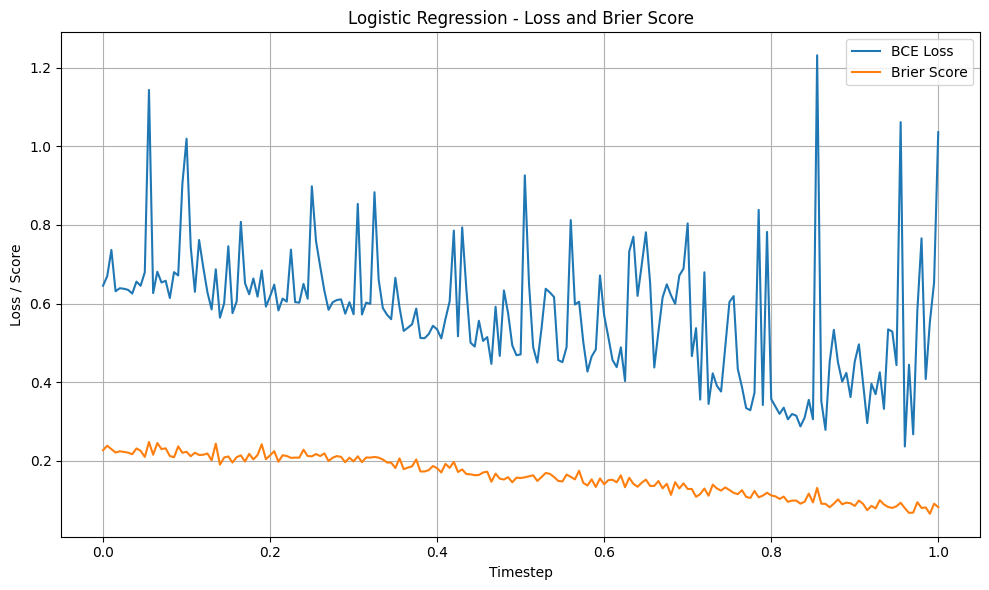

In [29]:
import process_data
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

x = process_data.plot_loss(models, test_data, "Logistic Regression")

Timestep 0.00%: Accuracy = 0.6997, Brier Score = 0.2137
Timestep 0.50%: Accuracy = 0.6408, Brier Score = 0.2262
Timestep 1.00%: Accuracy = 0.6836, Brier Score = 0.2268
Timestep 1.50%: Accuracy = 0.6870, Brier Score = 0.2246
Timestep 2.00%: Accuracy = 0.6614, Brier Score = 0.2207
Timestep 2.50%: Accuracy = 0.6216, Brier Score = 0.2295
Timestep 3.00%: Accuracy = 0.6818, Brier Score = 0.2157
Timestep 3.50%: Accuracy = 0.6989, Brier Score = 0.2177
Timestep 4.00%: Accuracy = 0.6555, Brier Score = 0.2321
Timestep 4.50%: Accuracy = 0.6535, Brier Score = 0.2187
Timestep 5.00%: Accuracy = 0.6261, Brier Score = 0.2179
Timestep 5.50%: Accuracy = 0.6687, Brier Score = 0.2369
Timestep 6.00%: Accuracy = 0.6974, Brier Score = 0.2154
Timestep 6.50%: Accuracy = 0.6830, Brier Score = 0.2255
Timestep 7.00%: Accuracy = 0.6667, Brier Score = 0.2294
Timestep 7.50%: Accuracy = 0.6480, Brier Score = 0.2104
Timestep 8.00%: Accuracy = 0.6457, Brier Score = 0.2159
Timestep 8.50%: Accuracy = 0.6796, Brier Score =

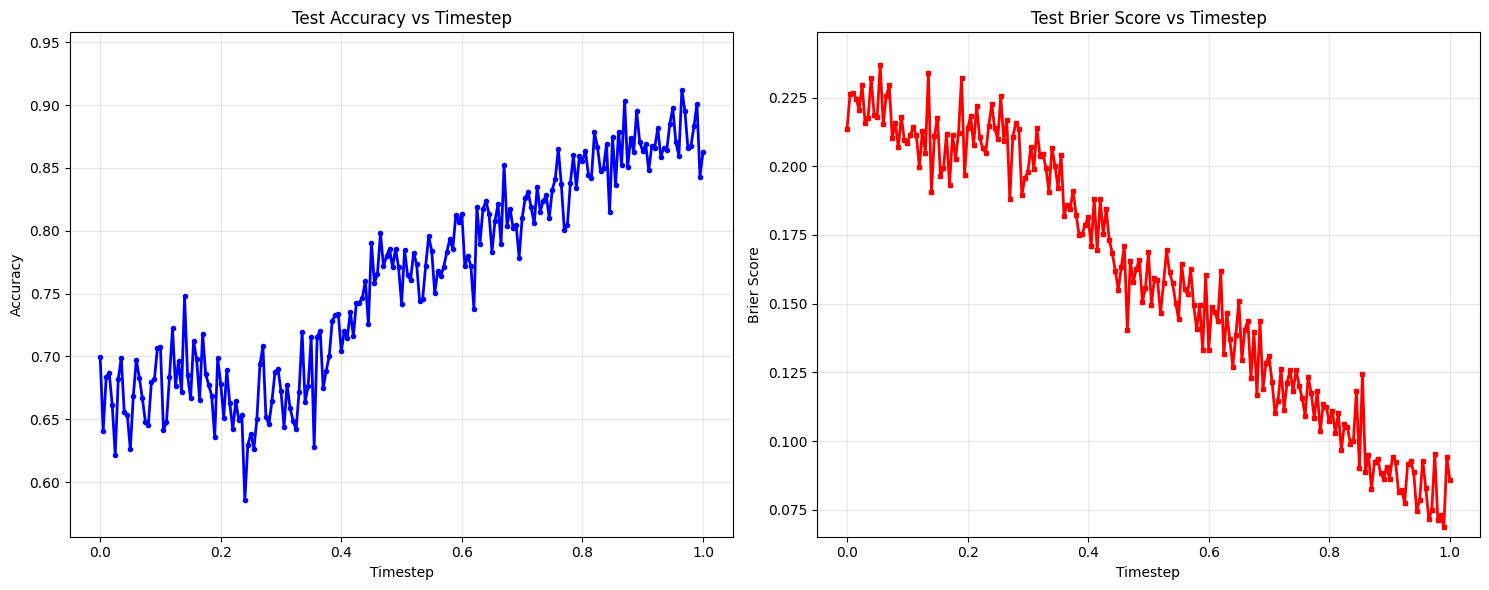


Summary Statistics:
Average Accuracy: 0.7596 ± 0.0809
Average Brier Score: 0.1589 ± 0.0478
Best Accuracy: 0.9123 at timestep 96.50%
Best Brier Score: 0.0686 at timestep 99.00%


In [18]:
# Test accuracy and Brier score of model for each timestep on test data and plot
accuracies = []
brier_scores = []
timesteps = []

for timestep, i in zip(models, test_data.keys()):
    model = models[timestep]
    # Convert test data to array
    y_test = np.array([row["label"] for row in test_data[i]])
    X_test = np.array([row["rows"].reshape(-1) for row in test_data[i]])
    
    # Calculate accuracy
    accuracy = model.score(X_test, y_test)
    
    # Calculate Brier score
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability predictions
    brier_score = brier_loss(y_test, y_test_pred_proba)
    
    print(f"Timestep {timestep:.2%}: Accuracy = {accuracy:.4f}, Brier Score = {brier_score:.4f}")
    accuracies.append(accuracy)
    brier_scores.append(brier_score)
    timesteps.append(timestep)

# Create subplots for both metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot accuracy
ax1.plot(timesteps, accuracies, 'b-', linewidth=2, marker='o', markersize=3)
ax1.set_xlabel("Timestep")
ax1.set_ylabel("Accuracy")
ax1.set_title("Test Accuracy vs Timestep")
ax1.grid(True, alpha=0.3)
ax1.set_ylim([min(accuracies) * 0.95, max(accuracies) * 1.05])

# Plot Brier score
ax2.plot(timesteps, brier_scores, 'r-', linewidth=2, marker='s', markersize=3)
ax2.set_xlabel("Timestep")
ax2.set_ylabel("Brier Score")
ax2.set_title("Test Brier Score vs Timestep")
ax2.grid(True, alpha=0.3)
ax2.set_ylim([min(brier_scores) * 0.95, max(brier_scores) * 1.05])

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nSummary Statistics:")
print(f"Average Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Average Brier Score: {np.mean(brier_scores):.4f} ± {np.std(brier_scores):.4f}")
print(f"Best Accuracy: {max(accuracies):.4f} at timestep {timesteps[np.argmax(accuracies)]:.2%}")
print(f"Best Brier Score: {min(brier_scores):.4f} at timestep {timesteps[np.argmin(brier_scores)]:.2%}")

In [30]:
modules_to_reload = [
    'process_data',
]

for module_name in modules_to_reload:
    if module_name in sys.modules:
        del sys.modules[module_name]

from process_data import write_predictions

write_predictions(models, interpolated_dir, [2024], 0, features, replace_nan_val = 0, phat_b = "xgboost_phat_b_model")

Loading data for 2024
Processed file:  game_401671629.csv
Processed file:  game_401671601.csv
Processed file:  game_401671826.csv
Processed file:  game_401671832.csv
Processed file:  game_401671749.csv
Processed file:  game_401671775.csv
Processed file:  game_401671761.csv
Processed file:  game_401671760.csv
Processed file:  game_401671774.csv
Processed file:  game_401671748.csv
Processed file:  game_401671833.csv
Processed file:  game_401671827.csv
Processed file:  game_401671600.csv
Processed file:  game_401671628.csv
Processed file:  game_401671616.csv
Processed file:  game_401671831.csv
Processed file:  game_401671825.csv
Processed file:  game_401671819.csv
Processed file:  game_401671762.csv
Processed file:  game_401671776.csv
Processed file:  game_401671789.csv
Processed file:  game_401671788.csv
Processed file:  game_401671777.csv
Processed file:  game_401671763.csv
Processed file:  game_401671818.csv
Processed file:  game_401671824.csv
Processed file:  game_401671830.csv
Proces